In [1]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objects as go
import math
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import chart_studio.plotly as py
import plotly.express as px
import numpy as np
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import itertools
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [2]:
data = pd.read_excel("data (Autosaved).xlsx")

In [4]:
data = data.iloc[:,1:]

In [5]:
data

,Ngày,VJC,HVN,ASG,MAS,NCT,SCS,SGN
0,2022-10-07,115000,11350.0,27100.0,36000.0,87800,73500.0,63800.0
1,2022-10-06,114200,12200.0,26800.0,36000.0,88000,74900.0,65000.0
2,2022-10-05,115000,12600.0,27000.0,35000.0,90000,75000.0,67000.0
3,2022-10-04,112900,12400.0,26600.0,33000.0,90900,75000.0,67400.0
4,2022-10-03,110000,12500.0,26600.0,33000.0,88000,74900.0,66300.0
...,...,...,...,...,...,...,...,...
996,2018-10-12,141000,NaN,NaN,NaN,75000,64636.0,NaN
997,2018-10-11,140800,NaN,NaN,NaN,73000,66431.0,NaN
998,2018-10-10,145000,NaN,NaN,NaN,74500,67239.0,NaN
999,2018-10-09,143000,NaN,NaN,NaN,77400,67329.0,NaN


In [6]:
data = data.loc[::-1].reset_index(drop=True)

In [7]:
data.head(15)

,Ngày,VJC,HVN,ASG,MAS,NCT,SCS,SGN
0,2018-10-08,140600,NaN,NaN,NaN,77500,NaN,NaN
1,2018-10-09,143000,NaN,NaN,NaN,77400,67329.0,NaN
2,2018-10-10,145000,NaN,NaN,NaN,74500,67239.0,NaN
3,2018-10-11,140800,NaN,NaN,NaN,73000,66431.0,NaN
4,2018-10-12,141000,NaN,NaN,NaN,75000,64636.0,NaN
5,2018-10-15,139200,NaN,NaN,NaN,75000,64187.0,NaN
6,2018-10-16,137000,NaN,NaN,NaN,74000,63065.0,NaN
7,2018-10-17,139200,NaN,NaN,NaN,75000,63289.0,137900.0
8,2018-10-18,136500,NaN,NaN,NaN,75000,61943.0,139800.0
9,2018-10-19,132000,NaN,NaN,NaN,75000,61045.0,139000.0


In [9]:
data.corr()

,VJC,HVN,ASG,MAS,NCT,SCS,SGN
VJC,1.000000,0.404875,-0.227026,-0.145535,0.518385,0.452232,0.151092
HVN,0.404875,1.000000,0.226090,-0.163598,0.040942,0.127334,0.762376
ASG,-0.227026,0.226090,1.000000,0.014353,-0.585037,-0.483831,-0.154163
MAS,-0.145535,-0.163598,0.014353,1.000000,-0.099051,-0.216133,0.221349
NCT,0.518385,0.040942,-0.585037,-0.099051,1.000000,0.832928,0.142295
SCS,0.452232,0.127334,-0.483831,-0.216133,0.832928,1.000000,-0.009323
SGN,0.151092,0.762376,-0.154163,0.221349,0.142295,-0.009323,1.000000


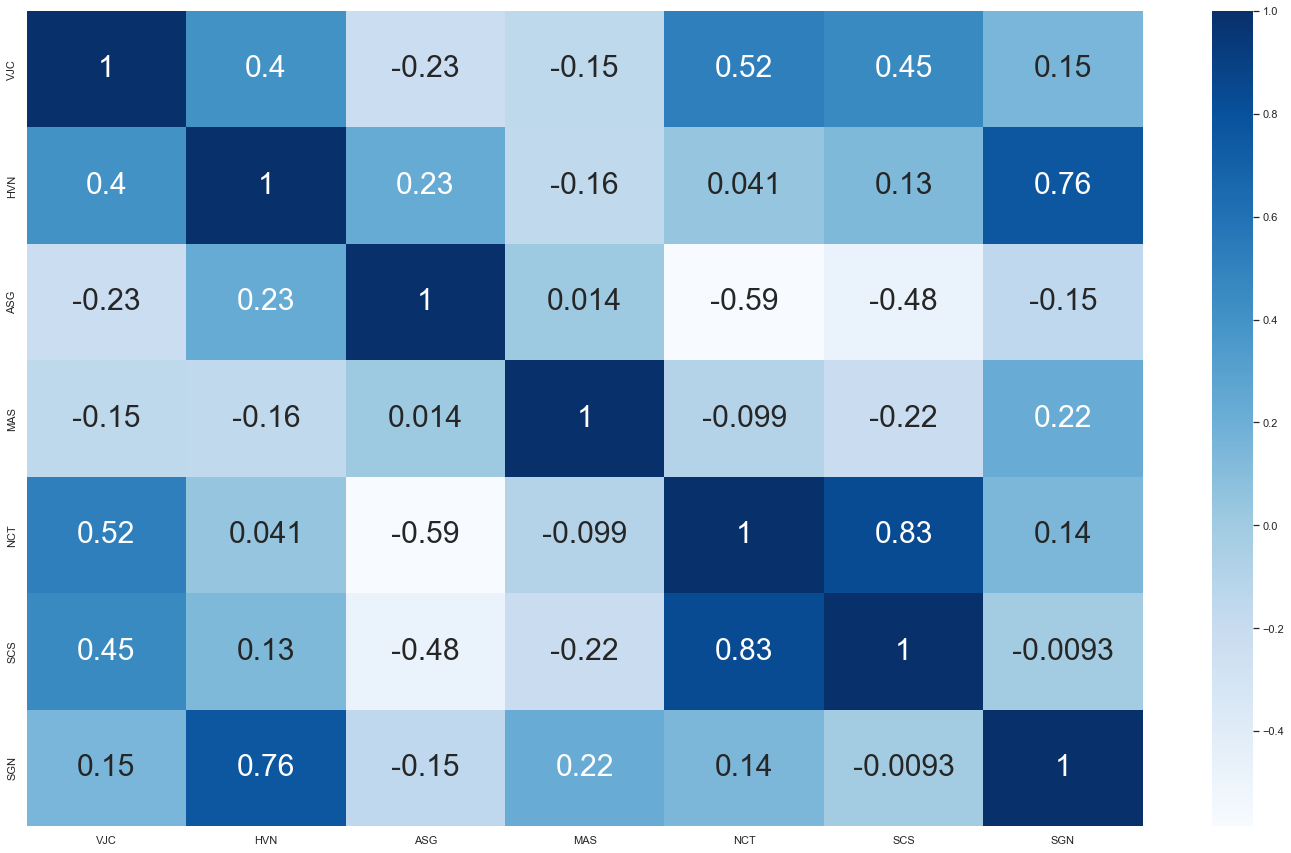

In [37]:
fig = sns.heatmap(data.corr(), annot=True, annot_kws={"size": 30},cmap="Blues")
fig.get_figure().savefig("corr.png")

In [23]:
test = pd.DataFrame(list(itertools.combinations(data.iloc[:,1:].columns,3)))
test
    

,0,1,2
0,VJC,HVN,ASG
1,VJC,HVN,MAS
2,VJC,HVN,NCT
3,VJC,HVN,SCS
4,VJC,HVN,SGN
5,VJC,ASG,MAS
6,VJC,ASG,NCT
7,VJC,ASG,SCS
8,VJC,ASG,SGN
9,VJC,MAS,NCT


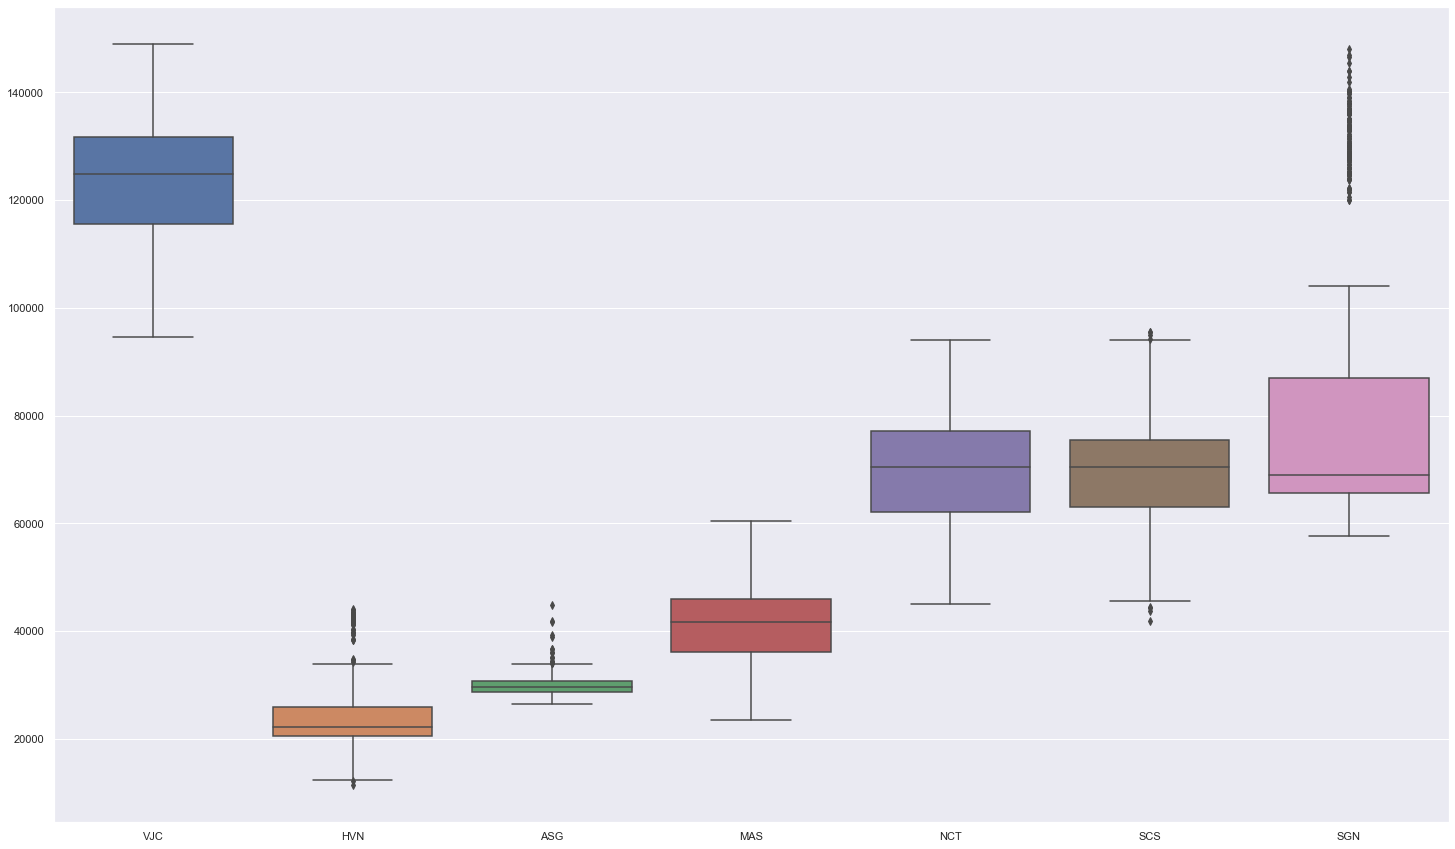

In [35]:
sns.set(rc={'figure.figsize':(25,15)})
fig = sns.boxplot(data = data)
fig.get_figure().savefig("1.png") 

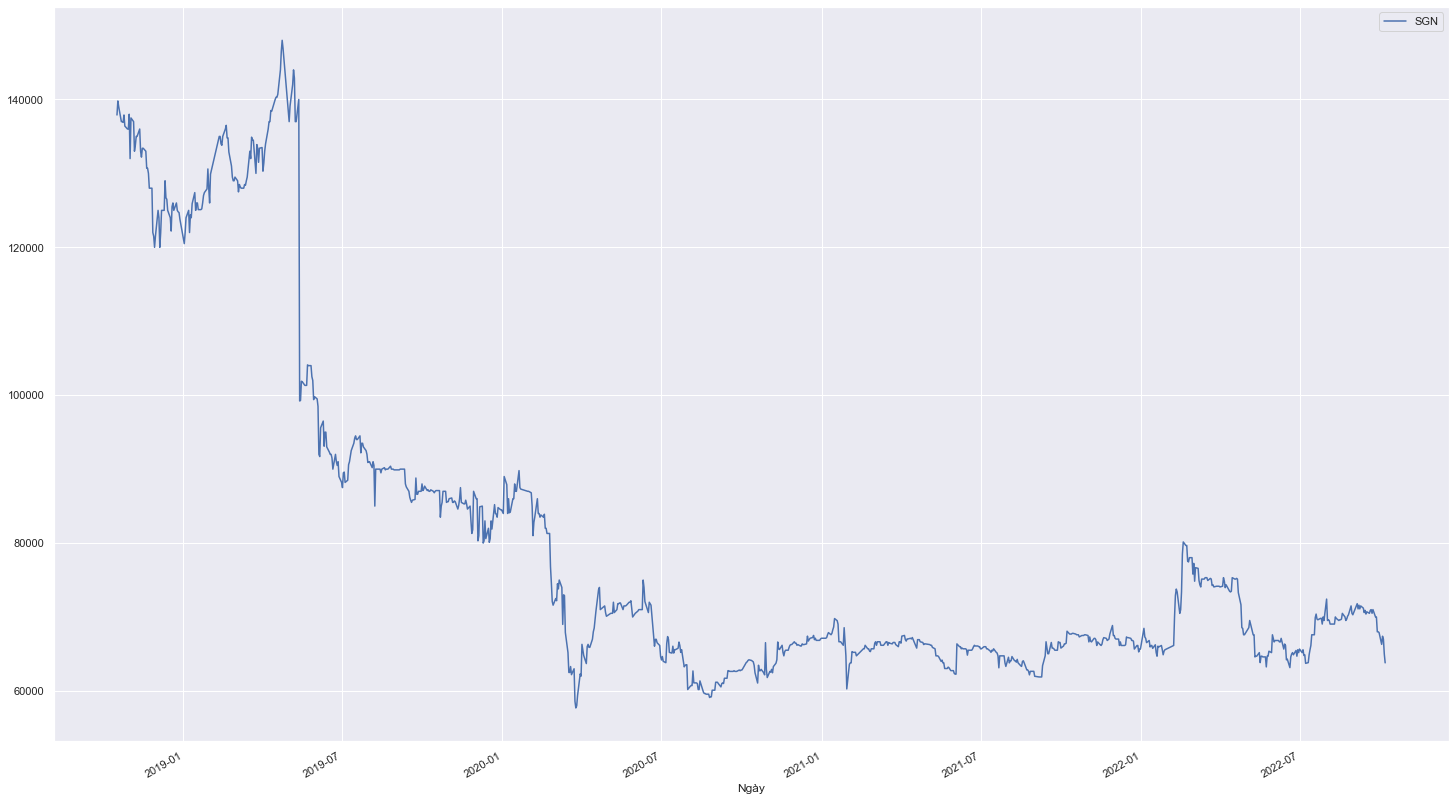

In [36]:
fig = data.plot(x='Ngày', y='SGN')
fig.get_figure().savefig("2.png")

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SGN', ylabel='Density'>

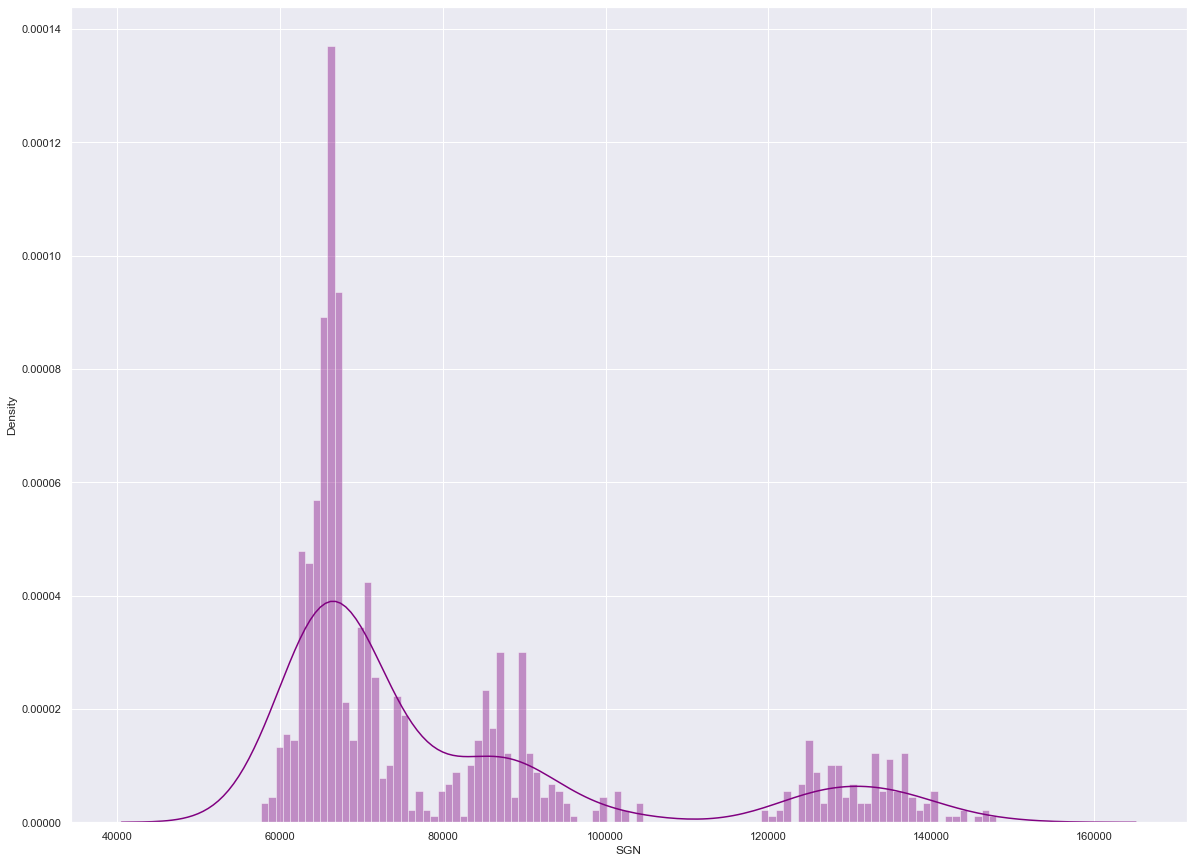

In [12]:
sns.distplot(data['SGN'].dropna(),bins=100,color='purple')

<AxesSubplot:>

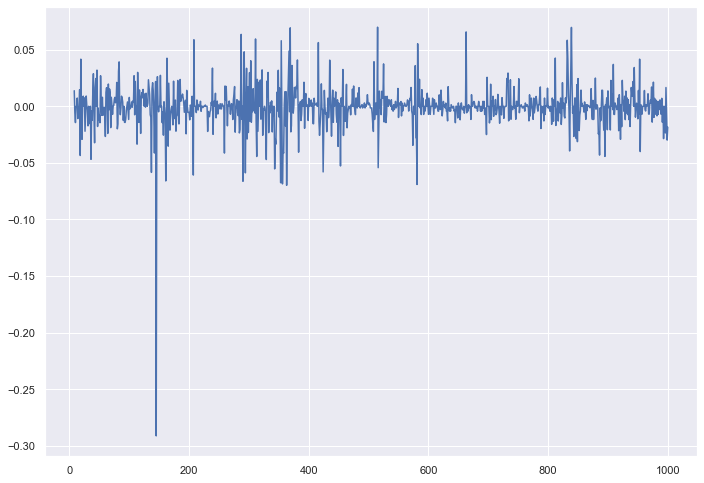

In [11]:
data['SGN'].pct_change().plot()

In [72]:
pct_mean = []

for column in data.iloc[:,1:].columns:
    pct_mean.append(data[column].pct_change().dropna().mean())
pct_mean

[0.00010688687352086556,
 -0.0016449844834189014,
 -9.482398890221002e-05,
 -0.0030677011298677883,
 -0.0003234779416366624,
 1.310251769636525e-05,
 -0.0002800631242230553]

In [86]:
df = pd.DataFrame(columns=data.iloc[:,1:].columns)

In [87]:
df_2 = pd.concat([pd.DataFrame(df.columns), pd.DataFrame(pct_mean)], axis=1)

In [89]:
df_2.columns = ["Stock", "Arithmetic Mean"]

In [90]:
df_2

,Stock,Arithmetic Mean
0,NCT,0.000107
1,SCS,-0.001645
2,ASG,-0.000095
3,HVN,-0.003068
4,VJC,-0.000323
5,MAS,0.000013
6,SGN,-0.000280


In [91]:
data

,Ngày,NCT,SCS,ASG,HVN,VJC,MAS,SGN
0,2021-10-08,87200,133500,28800,26100,128900,41800,70100
1,2021-10-11,88400,133700,28800,27000,132500,45000,70100
2,2021-10-12,88500,133800,28600,26700,132500,44400,70100
3,2021-10-13,87000,134600,28900,26450,133900,44400,70200
4,2021-10-14,87000,135000,28800,26300,134400,44400,70200
...,...,...,...,...,...,...,...,...
245,2022-10-03,88000,74900,26600,12500,110000,35000,66300
246,2022-10-04,90900,75000,26600,12400,112900,36000,67400
247,2022-10-05,90000,75000,27000,12600,115000,36000,67000
248,2022-10-06,88000,74900,26800,12200,114200,36000,65000


In [30]:
hist_return = pd.read_clipboard()

In [31]:
hist_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stock                      7 non-null      object 
 1   GEOMETRIC MEAN ANNUAL HPY  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


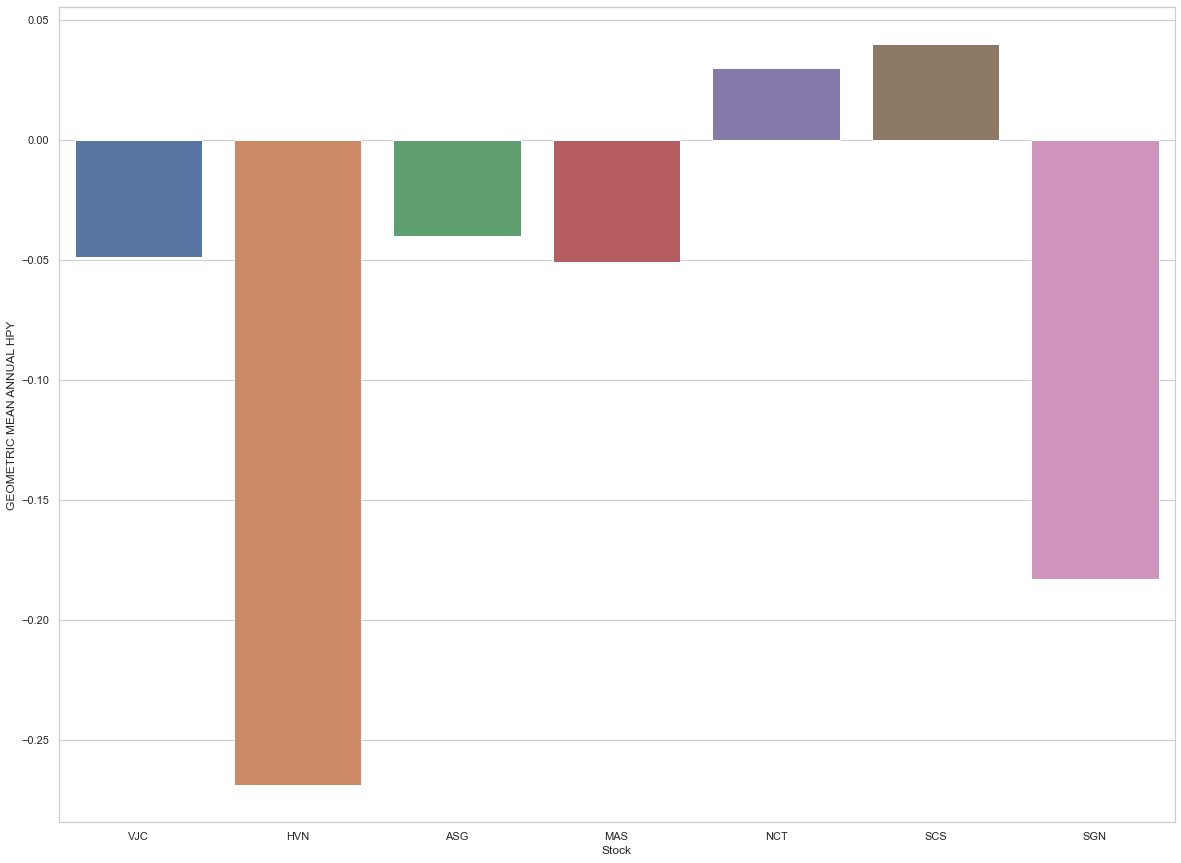

In [33]:
sns.set_style("whitegrid")
fig_return = sns.barplot(data=hist_return, x='Stock', y = 'GEOMETRIC MEAN ANNUAL HPY')
fig_return.get_figure().savefig("3.png")